In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

data = pd.read_csv('Parking_Violations.csv')

/usr/lib64/python3.4/site-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "
/usr/lib64/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (18,29,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [2]:
data.columns

Index(['﻿Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')

In [3]:
data.head()

,﻿Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1361929741,FCJ5493,NY,PAS,12/18/1970,20,SUBN,GMC,S,35030,...,BLACK,0,2013,-,0,NaN,NaN,NaN,NaN,NaN
1,1366962000,63540MC,NY,COM,02/02/1971,46,DELV,FRUEH,P,58830,...,BRN,0,2013,-,0,NaN,NaN,NaN,NaN,NaN
2,1356906515,GFM1421,NY,PAS,09/18/1971,40,SDN,MAZDA,X,13610,...,BLK,0,2010,-,7,NaN,NaN,NaN,NaN,NaN
3,1342296217,FYM5117,NY,SRF,09/18/1971,21,SUBN,NISSA,S,28190,...,WHITE,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
4,1342296199,95V6675,TX,PAS,09/18/1971,21,NaN,GMC,S,11790,...,SILVR,0,2008,-,0,NaN,NaN,NaN,NaN,NaN


# By states

In [4]:
# total
data.groupby('Registration State').size().order(ascending=False).head(10)

Registration State
NY    7029804
NJ     878677
PA     225760
CT     136973
FL     111887
MA      78650
VA      60951
MD      50407
IN      49126
NC      47117
dtype: int64

In [5]:
# percentage
temp = data.groupby('Registration State').size().apply(lambda x: 100*x/float(data.shape[0])).order(ascending=False).head(10)
temp

Registration State
NY    77.248234
NJ     9.655496
PA     2.480803
CT     1.505152
FL     1.229490
MA     0.864259
VA     0.669771
MD     0.553906
IN     0.539830
NC     0.517753
dtype: float64

In [6]:
# numbers from http://www.rita.dot.gov/bts/sites/rita.dot.gov.bts/files/publications/state_transportation_statistics_85/index.html
byStates = {'NY':10400000/2536000, 'NJ':7900000/2536000, 'PA':10500000/2536000, 'CT':2700000/2536000, 'FL':15700000/2536000, 'MA':4900000/2536000, 'VA':7100000/2536000, 'MD':4000000/2536000, 'IN':6000000/2536000, 'NC':7800000/2536000}
states = ['NY', 'NJ', 'PA', 'CT', 'FL', 'MA', 'VA', 'MD', 'IN', 'NC']
for state in states:
    print('%s\t%f' % (state, byStates[state]))

NY	4.100946
NJ	3.115142
PA	4.140379
CT	1.064669
FL	6.190852
MA	1.932177
VA	2.799685
MD	1.577287
IN	2.365931
NC	3.075710


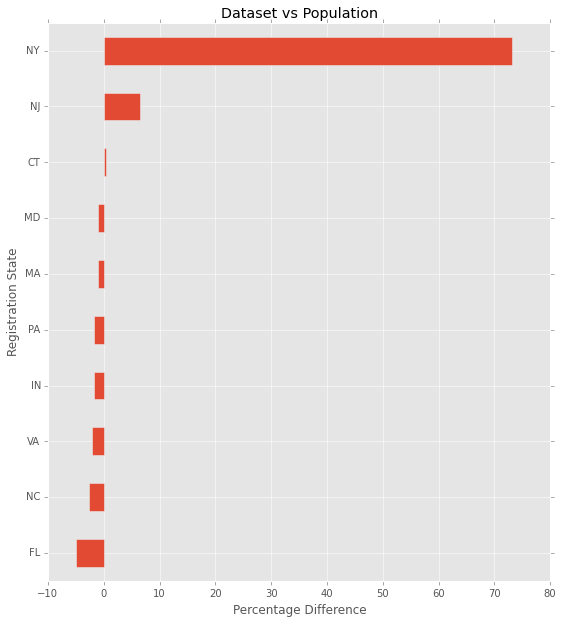

In [7]:
temp2 = pd.Series(byStates)
diff = temp - temp2
diff.order().plot(kind='barh', figsize=[9, 10])
plt.title('Dataset vs Population')
plt.ylabel('Registration State')
plt.xlabel('Percentage Difference')

# By colors

In [8]:
# some data cleaning
color = data.index[data['Vehicle Color'] == 'WH']
data.loc[color, 'Vehicle Color'] = 'WHITE'
color = data.index[data['Vehicle Color'] == 'WHT']
data.loc[color, 'Vehicle Color'] = 'WHITE'
color = data.index[data['Vehicle Color'] == 'WT']
data.loc[color, 'Vehicle Color'] = 'WHITE'

color = data.index[data['Vehicle Color'] == 'GY']
data.loc[color, 'Vehicle Color'] = 'GRAY'
color = data.index[data['Vehicle Color'] == 'GREY']
data.loc[color, 'Vehicle Color'] = 'GRAY'
color = data.index[data['Vehicle Color'] == 'GRY']
data.loc[color, 'Vehicle Color'] = 'GRAY'

color = data.index[data['Vehicle Color'] == 'BK']
data.loc[color, 'Vehicle Color'] = 'BLACK'
color = data.index[data['Vehicle Color'] == 'BLK']
data.loc[color, 'Vehicle Color'] = 'BLACK'

color = data.index[data['Vehicle Color'] == 'BL']
data.loc[color, 'Vehicle Color'] = 'BLUE'
color = data.index[data['Vehicle Color'] == 'BLU']
data.loc[color, 'Vehicle Color'] = 'BLUE'

color = data.index[data['Vehicle Color'] == 'SILVE']
data.loc[color, 'Vehicle Color'] = 'SILVER'
color = data.index[data['Vehicle Color'] == 'SL']
data.loc[color, 'Vehicle Color'] = 'SILVER'
color = data.index[data['Vehicle Color'] == 'SIL']
data.loc[color, 'Vehicle Color'] = 'SILVER'

color = data.index[data['Vehicle Color'] == 'RD']
data.loc[color, 'Vehicle Color'] = 'RED'

color = data.index[data['Vehicle Color'] == 'GR']
data.loc[color, 'Vehicle Color'] = 'GREEN'
color = data.index[data['Vehicle Color'] == 'GRN']
data.loc[color, 'Vehicle Color'] = 'GREEN'

color = data.index[data['Vehicle Color'] == 'BR']
data.loc[color, 'Vehicle Color'] = 'BROWN'
color = data.index[data['Vehicle Color'] == 'BRN']
data.loc[color, 'Vehicle Color'] = 'BROWN'

color = data.index[data['Vehicle Color'] == 'YW']
data.loc[color, 'Vehicle Color'] = 'YELLOW'
color = data.index[data['Vehicle Color'] == 'YELLO']
data.loc[color, 'Vehicle Color'] = 'YELLOW'

color = data.index[data['Vehicle Color'] == 'TN']
data.loc[color, 'Vehicle Color'] = 'TAN'

color = data.index[data['Vehicle Color'] == 'GL']
data.loc[color, 'Vehicle Color'] = 'GOLD'

color = data.index[data['Vehicle Color'] == 'OR']
data.loc[color, 'Vehicle Color'] = 'ORANGE'
color = data.index[data['Vehicle Color'] == 'ORANG']
data.loc[color, 'Vehicle Color'] = 'ORANGE'

color = data.index[data['Vehicle Color'] == 'PURPL']
data.loc[color, 'Vehicle Color'] = 'PURPLE'

In [9]:
# total
data.groupby('Vehicle Color').size().order(ascending=False).head(10)

Vehicle Color
WHITE     2595463
GRAY      1721538
BLACK     1676038
BLUE       750669
RED        538051
GREEN      359944
BROWN      355121
SILVER     327105
TAN        203212
YELLOW     113885
dtype: int64

In [10]:
# percentage
temp = data.groupby('Vehicle Color').size().apply(lambda x: 100*x/float(data.shape[0])).order(ascending=False).head(10)
temp

Vehicle Color
WHITE     28.520700
GRAY      18.917422
BLACK     18.417437
BLUE       8.248858
RED        5.912468
GREEN      3.955308
BROWN      3.902309
SILVER     3.594451
TAN        2.233031
YELLOW     1.251445
dtype: float64

In [11]:
# numbers from http://www.axaltacs.com/content/dam/New%20Axalta%20Corporate%20Website/Documents/Publications/Axalta2013_Global_Color_Popularity_Report.pdf
byColors = {'WHITE':26, 'GRAY':13, 'BLACK':20, 'BLUE':7, 'RED':9, 'GREEN':2, 'BROWN':5, 'SILVER':14, 'TAN':0.4, 'YELLOW':2}
colors = ['WHITE', 'GRAY', 'BLACK', 'BLUE', 'RED', 'GREEN', 'BROWN', 'SILVER', 'TAN', 'YELLOW']
for color in colors:
    print('%s\t%f' % (color, byColors[color]))

WHITE	26.000000
GRAY	13.000000
BLACK	20.000000
BLUE	7.000000
RED	9.000000
GREEN	2.000000
BROWN	5.000000
SILVER	14.000000
TAN	0.400000
YELLOW	2.000000


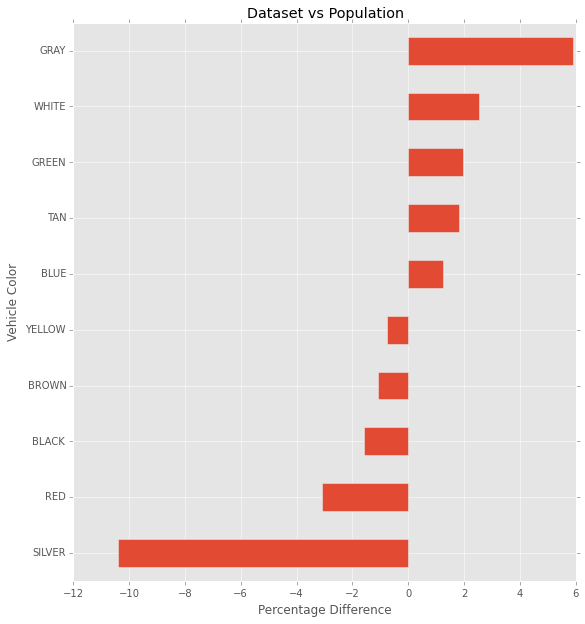

In [12]:
temp2 = pd.Series(byColors)
diff = temp - temp2
diff.order().plot(kind='barh', figsize=[9, 10])
plt.title('Dataset vs Population')
plt.ylabel('Vehicle Color')
plt.xlabel('Percentage Difference')

# By make

In [13]:
# some data cleaning
make = data.index[data['Vehicle Make'] == 'TOYOT']
data.loc[make, 'Vehicle Make'] = 'TOYOTA'

make = data.index[data['Vehicle Make'] == 'CHEVR']
data.loc[make, 'Vehicle Make'] = 'CHEVROLET'

make = data.index[data['Vehicle Make'] == 'NISSA']
data.loc[make, 'Vehicle Make'] = 'NISSAN'

make = data.index[data['Vehicle Make'] == 'ME/BE']
data.loc[make, 'Vehicle Make'] = 'MERCEDES-BENZ'

make = data.index[data['Vehicle Make'] == 'HYUND']
data.loc[make, 'Vehicle Make'] = 'HYUNDAI'

make = data.index[data['Vehicle Make'] == 'VOLKS']
data.loc[make, 'Vehicle Make'] = 'VOLKSWAGEN'

make = data.index[data['Vehicle Make'] == 'CHRYS']
data.loc[make, 'Vehicle Make'] = 'CHRYSLER'

make = data.index[data['Vehicle Make'] == 'LINCO']
data.loc[make, 'Vehicle Make'] = 'LINCOLN'

make = data.index[data['Vehicle Make'] == 'MITSU']
data.loc[make, 'Vehicle Make'] = 'MITSUBISHI'

make = data.index[data['Vehicle Make'] == 'INFIN']
data.loc[make, 'Vehicle Make'] = 'INFINITY'

make = data.index[data['Vehicle Make'] == 'MERCU']
data.loc[make, 'Vehicle Make'] = 'MERCURY'

make = data.index[data['Vehicle Make'] == 'SUBAR']
data.loc[make, 'Vehicle Make'] = 'SUBARU'

make = data.index[data['Vehicle Make'] == 'CADIL']
data.loc[make, 'Vehicle Make'] = 'CADILLAC'

make = data.index[data['Vehicle Make'] == 'FRUEH']
data.loc[make, 'Vehicle Make'] = 'FRUEHAUF'

In [14]:
# total
data.groupby('Vehicle Make').size().order(ascending=False).head(10)

Vehicle Make
FORD             1248622
TOYOTA            878786
HONDA             810460
CHEVROLET         743556
NISSAN            655276
DODGE             316499
GMC               313671
MERCEDES-BENZ     299845
FRUEHAUF          289634
INTER             277444
dtype: int64

In [15]:
# percentage
temp = data.groupby('Vehicle Make').size().apply(lambda x: 100*x/float(data.shape[0])).order(ascending=False).head(10)
temp

Vehicle Make
FORD             13.720702
TOYOTA            9.656694
HONDA             8.905882
CHEVROLET         8.170695
NISSAN            7.200615
DODGE             3.477905
GMC               3.446829
MERCEDES-BENZ     3.294899
FRUEHAUF          3.182694
INTER             3.048742
dtype: float64

In [16]:
# numbers from http://www.goodcarbadcar.net/2015/08/july-2015-usa-auto-sales-figures-by-brand-make.html
byMake = {'FORD':14.5, 'TOYOTA':12.3, 'HONDA':7.9, 'CHEVROLET':12.4, 'NISSAN':7.9, 'DODGE':2.9, 'GMC':3.1, 'MERCEDES-BENZ':2.1, 'FRUEHAUF':3.182694, 'INTER':3.048742}
makes = ['FORD', 'TOYOTA', 'HONDA', 'CHEVROLET', 'NISSAN', 'DODGE', 'GMC', 'MERCEDES-BENZ', 'FRUEHAUF', 'INTER']
for make in makes:
    print('%s\t%f' % (make, byMake[make]))

FORD	14.500000
TOYOTA	12.300000
HONDA	7.900000
CHEVROLET	12.400000
NISSAN	7.900000
DODGE	2.900000
GMC	3.100000
MERCEDES-BENZ	2.100000
FRUEHAUF	3.182694
INTER	3.048742


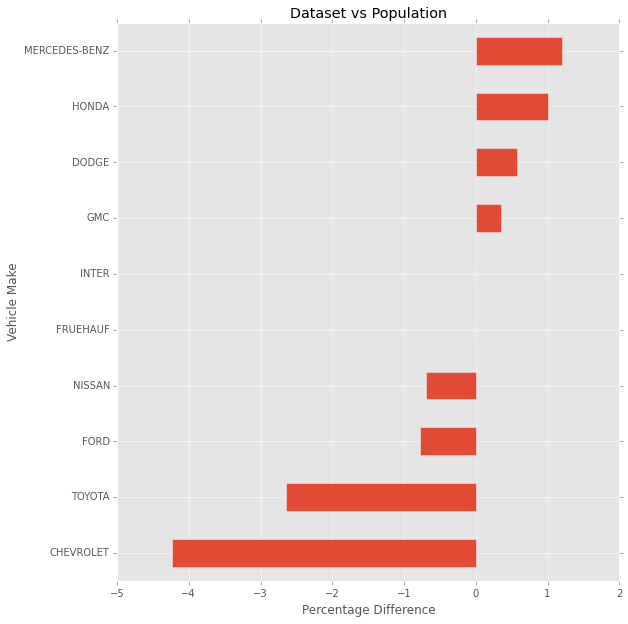

In [17]:
temp2 = pd.Series(byMake)
diff = temp - temp2
diff.order().plot(kind='barh', figsize=[9, 10])
plt.title('Dataset vs Population')
plt.ylabel('Vehicle Make')
plt.xlabel('Percentage Difference')

#By type

In [18]:
# some data cleaning
bodytype = data.index[data['Vehicle Body Type'] == 'SUBN']
data.loc[bodytype, 'Vehicle Body Type'] = 'SUV'
bodytype = data.index[data['Vehicle Body Type'] == 'UTIL']
data.loc[bodytype, 'Vehicle Body Type'] = 'SUV'

bodytype = data.index[data['Vehicle Body Type'] == '4DSD']
data.loc[bodytype, 'Vehicle Body Type'] = 'SEDAN'
bodytype = data.index[data['Vehicle Body Type'] == '2DSD']
data.loc[bodytype, 'Vehicle Body Type'] = 'SEDAN'
bodytype = data.index[data['Vehicle Body Type'] == 'SDN']
data.loc[bodytype, 'Vehicle Body Type'] = 'SEDAN'
bodytype = data.index[data['Vehicle Body Type'] == '4 DR']
data.loc[bodytype, 'Vehicle Body Type'] = 'SEDAN'

bodytype = data.index[data['Vehicle Body Type'] == 'PICK']
data.loc[bodytype, 'Vehicle Body Type'] = 'PICKUP'
bodytype = data.index[data['Vehicle Body Type'] == 'P-U']
data.loc[bodytype, 'Vehicle Body Type'] = 'PICKUP'

bodytype = data.index[data['Vehicle Body Type'] == 'DELV']
data.loc[bodytype, 'Vehicle Body Type'] = 'DELIVERY/TRUCK/TRAILER'
bodytype = data.index[data['Vehicle Body Type'] == 'REFG']
data.loc[bodytype, 'Vehicle Body Type'] = 'DELIVERY/TRUCK/TRAILER'
bodytype = data.index[data['Vehicle Body Type'] == 'TRAC']
data.loc[bodytype, 'Vehicle Body Type'] = 'DELIVERY/TRUCK/TRAILER'
bodytype = data.index[data['Vehicle Body Type'] == 'TRLR']
data.loc[bodytype, 'Vehicle Body Type'] = 'DELIVERY/TRUCK/TRAILER'
bodytype = data.index[data['Vehicle Body Type'] == 'FLAT']
data.loc[bodytype, 'Vehicle Body Type'] = 'DELIVERY/TRUCK/TRAILER'

bodytype = data.index[data['Vehicle Body Type'] == 'CONV']
data.loc[bodytype, 'Vehicle Body Type'] = 'CONVERTIBLE'

bodytype = data.index[data['Vehicle Body Type'] == 'MCY']
data.loc[bodytype, 'Vehicle Body Type'] = 'MOTORCYCLE'

bodytype = data.index[data['Vehicle Body Type'] == 'WAGO']
data.loc[bodytype, 'Vehicle Body Type'] = 'STATION WAGON'

In [ ]:
# total
data.groupby('Vehicle Body Type').size().order(ascending=False).head(10)

Vehicle Body Type
SEDAN                     3231219
SUV                       2876737
VAN                       1384393
DELIVERY/TRUCK/TRAILER     926666
PICKUP                     250156
TAXI                        50946
BUS                         43382
CONVERTIBLE                 41714
MOTORCYCLE                  28976
STATION WAGON               11936
dtype: int64

In [ ]:
# percentage
temp = data.groupby('Vehicle Body Type').size().apply(lambda x: 100*x/float(data.shape[0])).order(ascending=False).head(10)
temp

In [ ]:
# numbers from http://www.autocareweek.com/wp-content/uploads/2014/07/IHS_SUV_CUV_Share_Chart_071614.pdf
# http://www.nyc.gov/html/tlc/downloads/pdf/2014_taxicab_fact_book.pdf
# http://web.mta.info/nyct/facts/ffbus.htm
# http://www.truckinfo.net/trucking/stats.htm
# http://www.statista.com/statistics/191002/number-of-registered-motorcycles-in-the-us-by-state/
byBodyType = {'SEDAN':35.4, 'SUV':36.5, 'VAN':3.6, 'DELIVERY/TRUCK/TRAILER':0.7, 'PICKUP':13.1, 'TAXI':0.14, 'BUS':0.05, 'CONVERTIBLE':1.0, 'MOTORCYCLE':3.5, 'STATION WAGON': 1.2}
styles = ['SEDAN', 'SUV', 'VAN', 'DELIVERY/TRUCK/TRAILER', 'PICKUP', 'TAXI', 'BUS', 'CONVERTIBLE', 'MOTORCYCLE', 'STATION WAGON']
for style in styles:
    print('%s\t%f' % (style, byBodyType[style]))

In [ ]:
temp2 = pd.Series(byBodyType)
diff = temp - temp2
diff.order().plot(kind='barh', figsize=[9, 10])
plt.title('Dataset vs Population')
plt.ylabel('Vehicle Body Type')
plt.xlabel('Percentage Difference')

# By violation code

In [ ]:
# total
data.groupby('Violation Code').size().order(ascending=False).head(10)

In [ ]:
# percentage
temp = data.groupby('Violation Code').size().apply(lambda x: 100*x/float(data.shape[0])).order(ascending=False).head(10)
temp

Violation codes (from http://www1.nyc.gov/site/finance/vehicles/services-violation-codes.page)

**38** Muni Meter - Failing to show a receipt or tag in the windshield

**21** Street Cleaning: No parking where parking is not allowed by sign, street marking or traffic control device

**14** General No Standing: Standing or parking where standing is not allowed by sign, street marking or; traffic control device

**37** Muni Meter - Parking in excess of the allowed time

**20** General No Parking: No parking where parking is not allowed by sign, street marking or traffic control device

**71** Standing or parking a vehicle without showing a current inspection sticker

**46** Standing or parking on the roadway side of a vehicle stopped, standing or parked at the curb; in other words also known as "double parking"

**40** Stopping, standing or parking closer than 15 feet of a fire hydrant

**7** Vehicles photographed going through a red light at an intersection

**19** Bus Stop: Standing or parking where standing is not allowed by sign, street marking or; traffic control device